In [1]:
import numpy as np
from sklearn.datasets import load_digits
import gtda.homology
import gtda.diagrams
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler
from topconv import topfiltlearn, filters2diagrams, testmodels, diagrams_2_images, diagrams_2_tpers, concatenate_top_features

In [2]:
%load_ext autoreload
%autoreload 2

In [44]:
#Load data
from sklearn.preprocessing import OneHotEncoder
digits = load_digits()
X = np.reshape(digits.data, (len(digits.data),8,8))
y = digits.target


kNN Results:  [0.34390651 0.31552588 0.30217028]
Gradient Boosting Results:  [0.37562604 0.3572621  0.37228715]


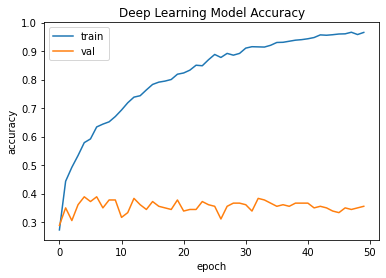

In [27]:
#Turn data into diagrams
D = filters2diagrams(X,[])
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
#Test these features on the learning task
testmodels(con_images,y)


In [37]:
print(np.shape(con_images))

(1797, 200)


In [41]:
(N,L) = np.shape(con_images)
m = int(L/200)
cors = np.zeros((m,m))
for i in range(m):
    for j in range(i,m):
        x =  np.ndarray.flatten(con_images[:,i*200:(i+1)*200])
        y =  np.ndarray.flatten(con_images[:,j*200:(j+1)*200])
        x_norm = np.linalg.norm(x)
        y_norm = np.linalg.norm(y)
        cors[i,j] = np.dot(x,y)/(x_norm*y_norm)
        cors[j,i] = cors[i,j]



kNN Results:  [0.23205342 0.25375626 0.25709516]
Gradient Boosting Results:  [0.26210351 0.26210351 0.24874791]


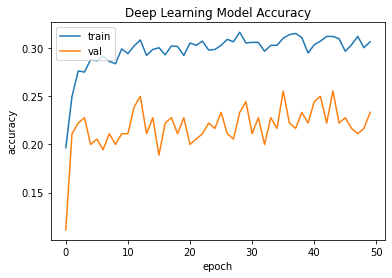

In [20]:
#We can also compute total persistence
tpers = diagrams_2_tpers(D)
#Concatenate this  across filters
con_tpers = concatenate_top_features(tpers)
#Test these features on the learning task
testmodels(con_tpers,y)

(4, 4, 4)
(1797, 1000)
kNN Results:  [0.34223706 0.31552588 0.30217028]
Gradient Boosting Results:  [0.37562604 0.3572621  0.3706177 ]


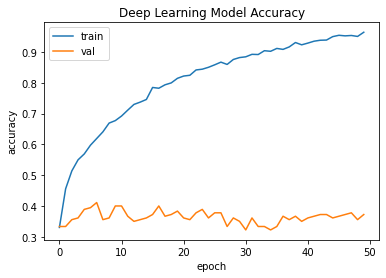

In [13]:
# Using some preset 4x4 filters
from scipy.ndimage import gaussian_filter, sobel, uniform_filter, laplace
A = np.zeros((4,4))
filters = [gaussian_filter(A,sigma=1), sobel(A),uniform_filter(A),laplace(A)]
#Turn data into diagrams
D = filters2diagrams(X,filters)
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
print(np.shape(con_images))
#Test these features on the learning task
testmodels(con_images,y)



(1797, 10)
kNN Results:  [0.23205342 0.25375626 0.25709516]
Gradient Boosting Results:  [0.26377295 0.25375626 0.24874791]


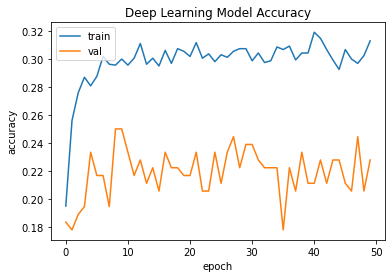

In [7]:
#We can also compute total persistence
tpers = diagrams_2_tpers(D)
#Concatenate this  across filters
con_tpers = concatenate_top_features(tpers)
print(np.shape(con_tpers))
#Test these features on the learning task
testmodels(con_tpers,y)

In [16]:
#Using PCA eigenfilters
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA 
patches = []
for im in X:
    patches.extend(extract_patches_2d(im,(4,4)))
#print(np.shape(patches))
patches = np.reshape(patches,(44925,16))
pca = PCA(n_components=16)
pca.fit(patches)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#print(pca.explained_variance_ratio_)
#M = np.asarray(pca.components_[:10]).T
#for i in range(16):
#    weights = np.random.uniform(size=10)
#    weights = weights/sum(weights)
#    filters.append(np.reshape(np.matmul(M,weights),(4,4)))
filters = []
for i in range(4):
    filters.append(np.reshape(pca.components_[i],(4,4)))
print(np.shape(filters))

(4, 4, 4)


(1797, 1000)
kNN Results:  [0.39899833 0.39232053 0.39398998]
Gradient Boosting Results:  [0.56260434 0.55258765 0.5409015 ]


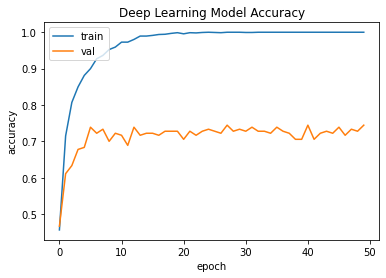

In [17]:
#Turn data into diagrams
D = filters2diagrams(X,filters)
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
print(np.shape(con_images))
#Test these features on the learning task
testmodels(con_images,y)

(1797, 10)
kNN Results:  [0.6427379  0.64941569 0.68447412]
Gradient Boosting Results:  [0.57262104 0.60267112 0.64941569]


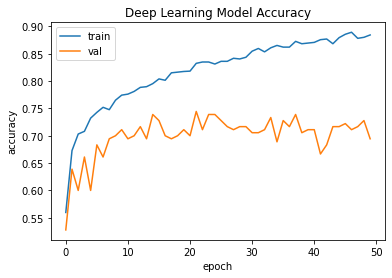

In [18]:
#We can also compute total persistence
tpers = diagrams_2_tpers(D)
#Concatenate this  across filters
con_tpers = concatenate_top_features(tpers)
print(np.shape(con_tpers))
#Test these features on the learning task
testmodels(con_tpers,y)

(1797, 1000)
kNN Results:  [0.4624374  0.46076795 0.44240401]
Gradient Boosting Results:  [0.49749583 0.49081803 0.48414023]


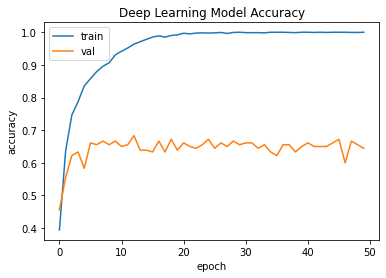

In [45]:
#Using random filters
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

filters = []
for i in range(4):
    filters.append(np.reshape(sample_spherical(1,16),(4,4)))

D = filters2diagrams(X,filters)
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
print(np.shape(con_images))
#Test these features on the learning task
testmodels(con_images,y)

In [46]:
(N,L) = np.shape(con_images)
m = int(L/200)
cors = np.zeros((m,m))
for i in range(m):
    for j in range(i,m):
        u =  np.ndarray.flatten(con_images[:,i*200:(i+1)*200])
        v =  np.ndarray.flatten(con_images[:,j*200:(j+1)*200])
        u_norm = np.linalg.norm(u)
        v_norm = np.linalg.norm(v)
        cors[i,j] = np.dot(u,v)/(u_norm*v_norm)
        cors[j,i] = cors[i,j]

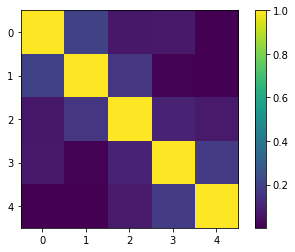

In [49]:
plt.imshow(cors)
plt.colorbar()

(1797, 10)
kNN Results:  [0.52253756 0.55592654 0.51252087]
Gradient Boosting Results:  [0.49582638 0.48747913 0.44407346]


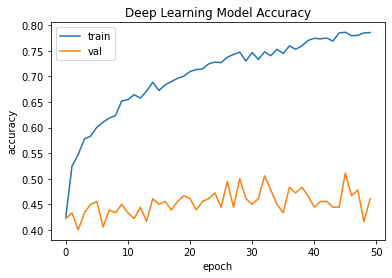

In [28]:
#We can also compute total persistence
tpers = diagrams_2_tpers(D)
#Concatenate this  across filters
con_tpers = concatenate_top_features(tpers)
print(np.shape(con_tpers))
#Test these features on the learning task
testmodels(con_tpers,y)

(1797, 10200)
kNN Results:  [0.69616027 0.75792988 0.71953255]
Gradient Boosting Results:  [0.65442404 0.67612688 0.65943239]


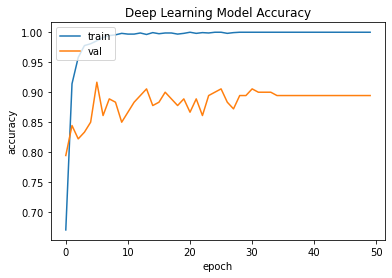

In [50]:
#Using random filters
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

filters = []
for i in range(50):
    filters.append(np.reshape(sample_spherical(1,16),(4,4)))

D = filters2diagrams(X,filters)
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
print(np.shape(con_images))
#Test these features on the learning task
testmodels(con_images,y)


(1797, 20200)
kNN Results:  [0.74791319 0.80634391 0.74791319]
Gradient Boosting Results:  [0.67779633 0.67111853 0.70283806]


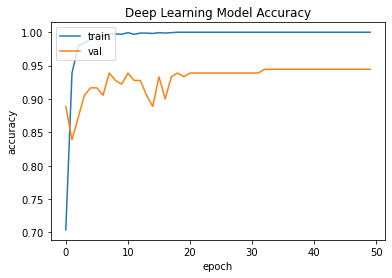

In [53]:
#Using random filters
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

filters = []
for i in range(100):
    filters.append(np.reshape(sample_spherical(1,16),(4,4)))

D = filters2diagrams(X,filters)
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
print(np.shape(con_images))
#Test these features on the learning task
testmodels(con_images,y)


(1797, 102)
kNN Results:  [0.80634391 0.83138564 0.83138564]
Gradient Boosting Results:  [0.69782972 0.69115192 0.66611018]


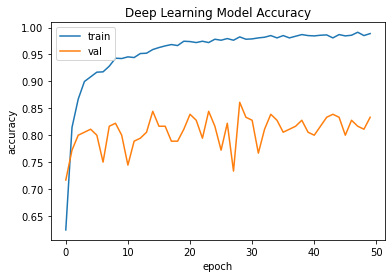

In [30]:
#We can also compute total persistence
tpers = diagrams_2_tpers(D)
#Concatenate this  across filters
con_tpers = concatenate_top_features(tpers)
print(np.shape(con_tpers))
#Test these features on the learning task
testmodels(con_tpers,y)

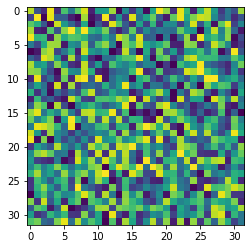

In [73]:
state = ScalarField.random_uniform(grid)  # generate initial condition
plt.imshow(state.data)


100%|██████████| 10.0/10.0 [00:00<00:00, 16.51it/s]   


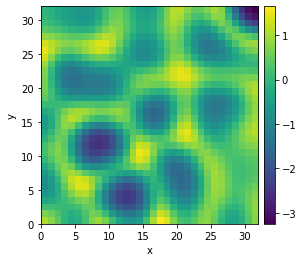

In [90]:
from pde import PDEBase, ScalarField, UnitGrid

class KuramotoSivashinskyPDE(PDEBase):
    """Implementation of the normalized Kuramoto–Sivashinsky equation"""

    def evolution_rate(self, state, t=0):
        """implement the python version of the evolution equation"""
        state_lap = state.laplace(bc="auto_periodic_neumann")
        state_lap2 = state_lap.laplace(bc="auto_periodic_neumann")
        state_grad = state.gradient(bc="auto_periodic_neumann")
        return - 2*state_grad.to_scalar("squared_sum") / 2 - state_lap - state_lap2


grid = UnitGrid([32, 32])  # generate grid

eq = KuramotoSivashinskyPDE()  # define the pde
result = eq.solve(state, t_range=10, dt=0.01)
result.plot()

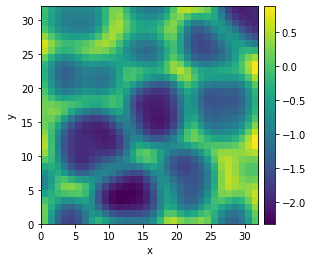

In [89]:
result.plot()